## Analysing DNA sequences

This notebook contains my notes on the lectures of the MOOC [ Algorithms for DNA Sequencing](https://www.coursera.org/learn/dna-sequencing/#syllabus) 

### Checking the longest common prefix in DNA string

In [1]:
def longestCommonPrefix(s1, s2):
    i = 0
    while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
        i += 1
    return s1[:i]
longestCommonPrefix('ACCATTG', 'ACCAAGTC')

'ACCA'

### Checking if sequences match

In [2]:
def match(s1, s2):
    if not len(s1) == len(s2):
        return False
    for i in range(0, len(s1)):
        if not s1[i] == s2[i]:
            return False
    return True
print (match('ACCATTG', 'ACCATTG'))
print (match('ACCAATG', 'ACCATTG'))

True
False


In [3]:
'ACCATTG' == 'ACCATTG'

True

### Manipulating dictionaries: DNA complementary bases

In [4]:
complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}

In [5]:
complement['A']

'T'

In [6]:
complement['C']

'G'

### DNA reverse complementary bases

In [7]:
def reverseComplement(s):
    complement = {'A': 'T', 'C': 'G', 'G': 'C', 'T': 'A'}
    t = ''
    for base in s:
        t = complement[base] + t
    return t
reverseComplement('ACCATTG')

'CAATGGT'

### Reading a DNA sequence of E. coli strain 52148 chromosome

In [5]:
def readGenome(filename):
    genome = ''
    with open(filename, 'r') as f:
        for line in f:
            # ignore header line with genome information
            if not line[0] == '>':
                genome += line.rstrip()
    return genome
genome = readGenome('escherichia-coli-sequence.fastq')
genome

'TTGCCGCAATTGTTCACAAGCGACGTTTAACCCGTGCGCACGAAAATCCAGGTATTCCCGCGCCTGCTGCGCGTAATTCAACAGTTTATGCGCGGCAGATCGCAGAGCATACAACGAGGCGTTAGCGTAAGCGGCATGAAGCAACGCCTGAATTGGCTGGGCGAACAGCGAATCTTCCCACAACTGATCGGCAGCATGACGAATATGTTCGAGGTCCGCCAGATCGGCATGACGCCAGCGCCTGCCAAGCGCGGCATGGGCAAAATCTTCCACCCAGCGTTGTTGCTCTGGCGGTGGTAACTTACCGTTGTTGGCTAACTCATAGCGCGCCCGATTCGCCAGGTAGCCCCACATCGACGACACCGGAAATATCTGCTGTGGCGTAATACAGCCTTTCATCAGCGTCCCGGAAATCAGTGCCCGCACCTGGTCGGCGTCGTCACTGTTACGATCCTGTTGATCGAACTTATTGACCAGCACGTACAGCGGCACCGATTGCCCCACCGCCAAAATCGCCTCACGGACCTCTTCATCGGAGATCGATTTCAGTTGCGTATAATCCAGCACCGCCAGTACCGCCGAGGCGCGTGCCAGCTGCTGGTTAAGCATTTTTTGCAGATGCGGTTGCCCGGCTTCATTTGGCCCGGGGGTATCCAGTAACGTCAACTGACCGGGATAACTCTCCAGCCCCGCTAGATGGACAAACTCCACTTCAATCACGGGAATATGCTCAATGGCGGCGTAAGCAGAAAAAGGAAAATCGACGTCCAGCGCCTTCGCCAGTCGCACTAAATCATTCAAACTTTTCAGACAATGAAAAATAGGCTGGGCACCCAGATAATATTTTTCGAAAGCGACGCCATTTTCGATCCGCTGCATAAGCGCACGCATATCTTTATCTATTTCCAGCACATCGGTCAGATGCTTAATATCGCAATCACGCAGGCGCTGTTGTAATTGTTGAATTAAACAATCGATTGGCGCGACATGTGAAAAATG

In [6]:
len(genome)

1246770

### Counting the number of occurences for each base

In [3]:
counts = {'A': 0, 'C': 0, 'G': 0, 'T': 0}
for base in genome:
    counts[base] += 1
print(counts)

{'A': 304181, 'C': 315878, 'G': 320332, 'T': 306379}


In [4]:
import collections
collections.Counter(genome)

Counter({'A': 304181, 'C': 315878, 'G': 320332, 'T': 306379})

### Checking base quality (Q)

In [18]:
#Reading .fastq file and separating sequences (seqs) and qualities (quals) reads in two separated lists
def readFastq(filename):
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')
print(seqs[:5])    #sequences reads
print(quals[:5])   #quality reads

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

In [29]:
# Converting ASCII symbols in quality scores

def phred33ToQ(qual):
    return ord(qual) - 33
print(phred33ToQ('#'),'--> a low quality score means a low confidence in our value')
print(phred33ToQ('H'), '--> a higher quality score means a higher confidence in our value')

2 --> a low quality score means a low confidence in our value
39 --> a higher quality score means a higher confidence in our value


In [12]:
 # Create a histogram of quality scores
def createHist(qualityStrings):
       hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


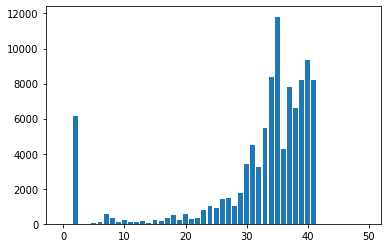

In [23]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()